In [1]:
#the chosen Dataset presents information on the structure of movie theatres in Austria, where the data is shared among the Bundesländer (or states). 
#RQs: a)For the purposes of the assignment, I wanted to compare the structure of the movie theatres (Kinosäle) amovng the Austrian states.
#     b) compare the number of sitplaces in the given movie theatres .
# This visualisation gives us,so to say, a picture of the development of entertainment in the sphere of cinema. Of course this information cannot be fully correct, 
#because we do not have any further data on the number of citizens, their age, etc.
#In order to analyze the dataset that, I have to upload the file into the notebook (.read_csv)
#Before uploading the file, I decided to import a few packages that will or could be useful

In [4]:
#tabula dataset, importing packages and the dataset
#csv, etc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import os
dataset = pd.read_csv('C:/Users/tanja/OneDrive/Documents/GitHub/Struktur der Kinos.csv')

In [7]:
!pip install geopandas 
#was installed for training purposes only

In [8]:
#it is neseccary to "clean" the chosen dataset from various separators to make it readable 
#it is achieved using "sep" function as shown below
dataset = pd.read_csv('C:/Users/tanja/OneDrive/Documents/GitHub/Struktur der Kinos.csv', sep = ";")

In [ ]:
#exploration of the dataset using various methods such as .head(), .tail(),.info(), .describe()

In [9]:
#the .head() and .tail methods are helpful for quickly inspecting the beginning and end of the dataset, 
#giving a sense of the data's structure and contents.
dataset.head() #shows the first 5 rows of the dataset

,Bundesland,Kinos,Kinosäle,Sitzplätze,Sitzplätze pro Tausend der Bevölkerung,"Kinobesuche, in Tausend",Kinobesuche pro Tausend der Bevölkerung
0,Burgenland,5,20,2513,"8,4","165,1",555
1,Kärnten,8,34,6351,"11,2","279,9",496
2,Niederösterreich,26,98,13995,"8,2","777,3",457
3,Oberösterreich,25,94,13342,"8,9","938,4",623
4,Salzburg,9,29,4965,"8,8","345,4",614


In [5]:
dataset.tail() #shows the last 5 rows of the dataset

,Bundesland,Kinos,Kinosäle,Sitzplätze,Sitzplätze pro Tausend der Bevölkerung,"Kinobesuche, in Tausend",Kinobesuche pro Tausend der Bevölkerung
5,Steiermark,19,80,12641,"10,1","706,2",564
6,Tirol,11,46,7373,"9,6","451,8",591
7,Vorarlberg,8,26,4347,"10,8","255,2",635
8,Wien,27,138,24734,"12,8","1375,6",712
9,Österreich,138,565,90261,"10,1","5294,9",590


In [6]:
#This method is useful for quickly understanding the structure of the dataset and identifying any missing values or inconsistencies
dataset.info() #explore, types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Bundesland                               10 non-null     object
 1   Kinos                                    10 non-null     int64 
 2   Kinosäle                                 10 non-null     int64 
 3   Sitzplätze                               10 non-null     int64 
 4   Sitzplätze pro Tausend der Bevölkerung   10 non-null     object
 5   Kinobesuche, in Tausend                  10 non-null     object
 6   Kinobesuche pro Tausend der Bevölkerung  10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [7]:
#print statement displays the ntire dataframe
print(dataset)

         Bundesland  Kinos  Kinosäle  Sitzplätze  \
0        Burgenland      5        20        2513   
1           Kärnten      8        34        6351   
2  Niederösterreich     26        98       13995   
3    Oberösterreich     25        94       13342   
4          Salzburg      9        29        4965   
5        Steiermark     19        80       12641   
6             Tirol     11        46        7373   
7        Vorarlberg      8        26        4347   
8              Wien     27       138       24734   
9        Österreich    138       565       90261   

  Sitzplätze pro Tausend der Bevölkerung Kinobesuche, in Tausend  \
0                                    8,4                   165,1   
1                                   11,2                   279,9   
2                                    8,2                   777,3   
3                                    8,9                   938,4   
4                                    8,8                   345,4   
5                  

In [8]:
dataset.describe()
#These summary statistics provide insights into the central tendency, variability, and distribution of the four variables across the dataset.

,Kinos,Kinosäle,Sitzplätze,Kinobesuche pro Tausend der Bevölkerung
count,10.00000,10.000000,10.000000,10.000000
mean,27.60000,113.000000,18052.200000,583.700000
std,39.68263,163.506031,26200.556889,71.959943
min,5.00000,20.000000,2513.000000,457.000000
25%,8.25000,30.250000,5311.500000,557.250000
50%,15.00000,63.000000,10007.000000,590.500000
75%,25.75000,97.000000,13831.750000,620.750000
max,138.00000,565.000000,90261.000000,712.000000


C:\Users\tanja\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


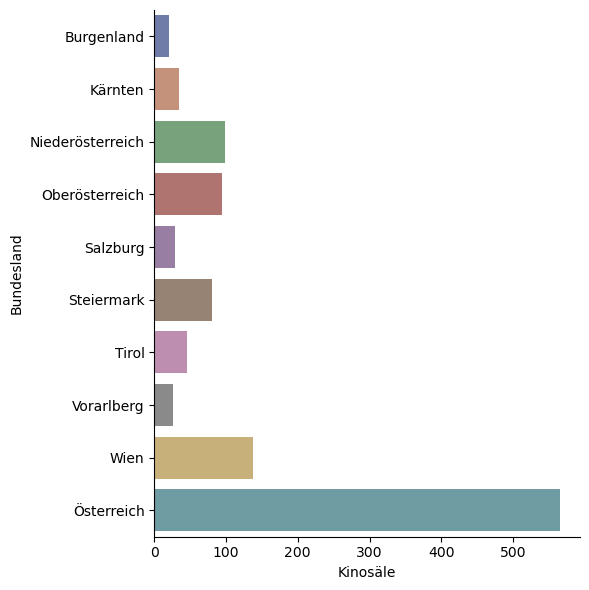

In [9]:
#visualisation of the halls in the movie thetres in each state of Austria and the whole country for comparison. 
#we can see the difference better due to the illustration using bar chart (+ the total in the whole country)
g = sns.catplot(
    data=dataset, kind="bar",
    x="Kinosäle", y="Bundesland", palette="dark", alpha=.6, height=6
)

C:\Users\tanja\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


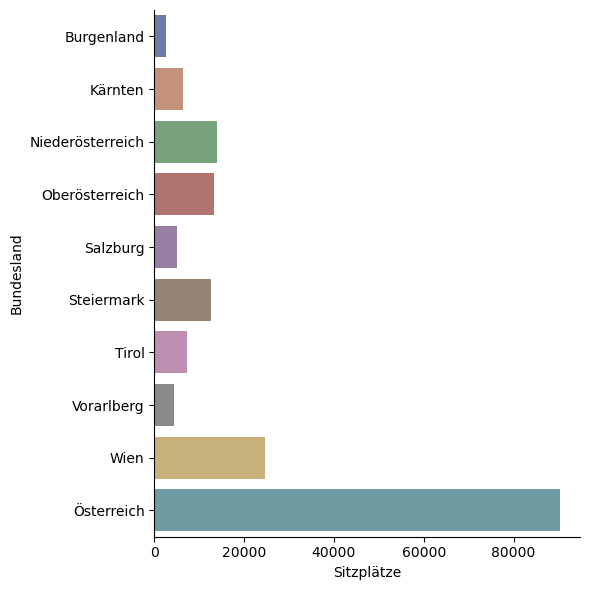

In [10]:
#now we can compare the number of seats in the movie theatres in every state (Bundesland) and see the total in the whole country
g = sns.catplot(
    data=dataset, kind="bar",
    x="Sitzplätze", y="Bundesland", palette="dark", alpha=.6, height=6
)

In [20]:
#one more dataset to see what countries provide more films for Austrian movie theatres
country = pd.read_csv('C:/Users/tanja/OneDrive/Documents/GitHub/Marktanteile der erstaufgeführten Kinofilme 2021 nach Herkunftsländern (Tabelle).csv', sep = ";")

In [15]:
#same procedure as we the dataset above
country.head() #shows the first 5 rows 

,Herkunftsland,Anzahl der Filme,Besuche in Tausend,Besuche in Prozent
0,USA,82,"3979,4","76,1"
1,Deutschland,54,"765,8","14,6"
2,Österreich,25,"137,7","2,6"
3,Vereinigtes Königreich,20,"95,2","1,8"
4,Frankreich,25,"45,9","0,9"


In [16]:
country.tail() #shows the last 5 rows 

,Herkunftsland,Anzahl der Filme,Besuche in Tausend,Besuche in Prozent
6,Italien,5,"8,7","0,2"
7,Türkei,7,"5,7","0,1"
8,Schweiz,5,"4,8","0,1"
9,Sonstige,39,"16,6","3,2"
10,Insgesamt,267,"5228,3","100,0"


In [17]:
print(country)

             Herkunftsland  Anzahl der Filme Besuche in Tausend  \
0                      USA                82             3979,4   
1              Deutschland                54              765,8   
2               Österreich                25              137,7   
3   Vereinigtes Königreich                20               95,2   
4               Frankreich                25               45,9   
5                    Japan                 5               18,8   
6                  Italien                 5                8,7   
7                   Türkei                 7                5,7   
8                  Schweiz                 5                4,8   
9                 Sonstige                39               16,6   
10               Insgesamt               267             5228,3   

   Besuche in Prozent  
0                76,1  
1                14,6  
2                 2,6  
3                 1,8  
4                 0,9  
5                 0,4  
6                 0,2  
7  

In [18]:
country.info() #explore, types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Herkunftsland       11 non-null     object
 1   Anzahl der Filme    11 non-null     int64 
 2   Besuche in Tausend  11 non-null     object
 3   Besuche in Prozent  11 non-null     object
dtypes: int64(1), object(3)
memory usage: 484.0+ bytes


In [19]:
country.describe()

,Anzahl der Filme
count,11.000000
mean,48.545455
std,76.354913
min,5.000000
25%,6.000000
50%,25.000000
75%,46.500000
max,267.000000


C:\Users\tanja\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


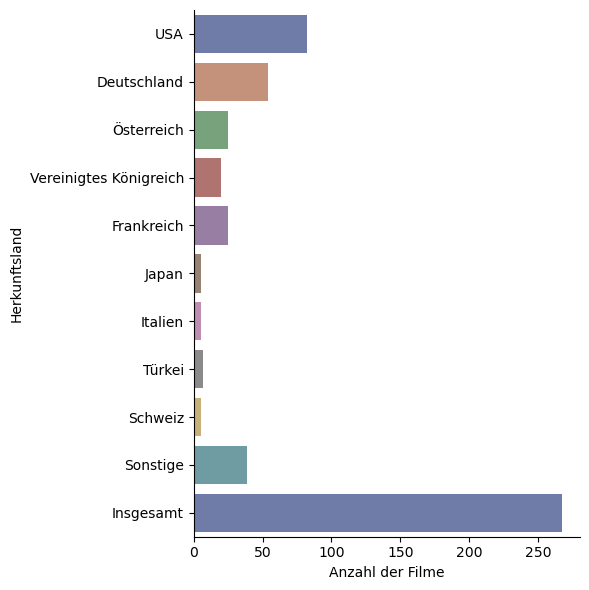

In [21]:
#visualisation of the chosen table in order to compare
g = sns.catplot(
    data=country, kind="bar",
    x="Anzahl der Filme", y="Herkunftsland", palette="dark", alpha=.6, height=6
)